# Numerical Exponential Decay

$y'(x) = -ax$

$y(0) = y_0$

$y(x) = e^{-ax}$

In [105]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [106]:
def dy(y, x, a):
    return -a*y
def ye(x, a):
    return np.exp(-a*x)

In [107]:
x0 = 0
x1 = 10
n = 6
I0 = 1
a = 3

# Scipy ODEInt

In [108]:
dx = (x1 - x0)/n
x = np.linspace(x0, x1, n+1)
yn = odeint(dy, I0, x, args=(a,))

# By hand

In [109]:
A = np.zeros([n, n])
b = np.zeros(n)

# Surface
A[0,0] = a + 7/(5*dx)
A[0,1] = 1/(5*dx)
b[0] = 8*I0/5

# Interior
for i in range(1, n-1):
    A[i,i-1] = -1/(2*dx)
    A[i,i] = a
    A[i,i+1] = 1/(2*dx)
    
# Bottom
A[n-1,n-3] = 1/(2*dx)
A[n-1,n-2] = -2/dx
A[n-1,n-1] = a + 3/(2*dx)

# Solve
xh = np.linspace(x0+dx/2, x1-dx/2, n)
yh = lstsq(A, b)[0]

# Plot

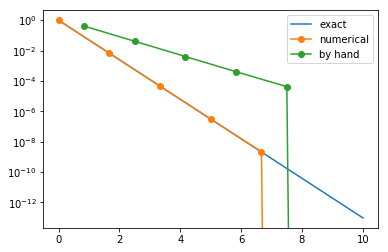

In [110]:
plt.plot(x, ye(x, a), label='exact')
plt.plot(x, yn, 'o-', label='numerical')
plt.plot(xh, yh, 'o-', label='by hand')
plt.yscale('log')
plt.legend()

# So clearly, this is not the best technique 
(for low resolution, high absorption)